In [1]:
import pandas as pd

In [3]:
file_path= "/content/_cafe_sales.csv"
df=pd.read_csv(file_path)

print(df)

     Transaction ID      Item Quantity Price Per Unit Total Spent  \
0       TXN_1961373    Coffee        2            2.0         4.0   
1       TXN_4977031      Cake        4            3.0        12.0   
2       TXN_4271903    Cookie        4            1.0       ERROR   
3       TXN_7034554     Salad        2            5.0        10.0   
4       TXN_3160411    Coffee        2            2.0         4.0   
...             ...       ...      ...            ...         ...   
9995    TXN_7672686    Coffee        2            2.0         4.0   
9996    TXN_9659401       NaN        3            NaN         3.0   
9997    TXN_5255387    Coffee        4            2.0         8.0   
9998    TXN_7695629    Cookie        3            NaN         3.0   
9999    TXN_6170729  Sandwich        3            4.0        12.0   

      Payment Method  Location Transaction Date  
0        Credit Card  Takeaway       2023-09-08  
1               Cash  In-store       2023-05-16  
2        Credit Card 

# Finding missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [5]:
df.isnull().sum()

,0
Transaction ID,0
Item,333
Quantity,138
Price Per Unit,179
Total Spent,173
Payment Method,2579
Location,3265
Transaction Date,159


# What to do with the missing values?

In [6]:

# Column 1 - Transaction ID (Cont)- there are no missing values

# Column 2 - Item (Categorical)- it is less than 50% so we can either impute mode or unknown.

mode_item = df['Item'].mode()[0]
df['Item'].fillna(mode_item, inplace=True)

# Column 3- Quantity (Cont)- the column is not skewed, it is more towards normal hence will impute the mean

df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
mean_quantity = df['Quantity'].mean()
df['Quantity'].fillna(mean_quantity, inplace=True)

# Column 4- Price per Unit (cont)- the graph seems a little left skewed but with .skew()it seems more normal

df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
mean_price = df['Price Per Unit'].mean()
df['Price Per Unit'].fillna(mean_price, inplace=True)

#Column 5-  Total Spent(cont)- skewed hence we will take the median

df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
median_total = df['Total Spent'].median()
df['Total Spent'].fillna(median_total, inplace=True)

# Column 6- Payment method ( categorical)- 25% of the values are missing, so will insert "unknown". won't take mode because should inser that when less than 10% missing
df['Payment Method'].fillna("Unknown", inplace=True)

# Column 7- Location (Categorical)- 32% missing so will insert with "Unknown"
df['Location'].fillna("Unknown", inplace=True)

# Column 8- Transaction Date ( Categorical)- less than 10% of the data is missing.

df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
mode_date = df['Transaction Date'].mode()[0]
df['Transaction Date'].fillna(mode_date, inplace=True)




<ipython-input-6-06dcbe287346>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item'].fillna(mode_item, inplace=True)
<ipython-input-6-06dcbe287346>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [7]:
df.isnull().sum()

,0
Transaction ID,0
Item,0
Quantity,0
Price Per Unit,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,0


In [8]:
df["Item"].value_counts()

,count
Item,
Juice,1504
Coffee,1165
Salad,1148
Cake,1139
Sandwich,1131
Smoothie,1096
Cookie,1092
Tea,1089
UNKNOWN,344


In [9]:
df["Item"].describe()

,Item
count,10000
unique,10
top,Juice
freq,1504


# Dealing with Quantity

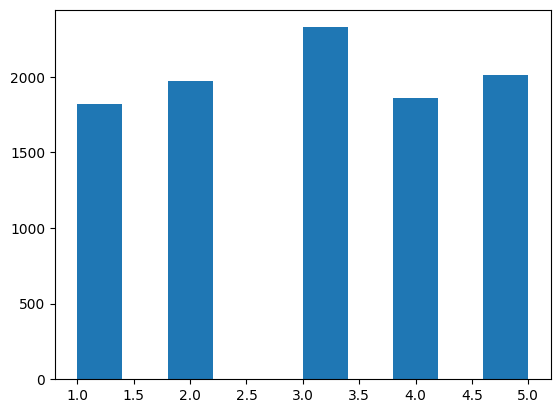

In [10]:
import matplotlib.pyplot as plt

plt.hist(df['Quantity'])
plt.show()

#mostly towards normally skewed

In [11]:
df['Quantity'].skew()

np.float64(-0.008293802958472509)

# Dealing with Price per Unit

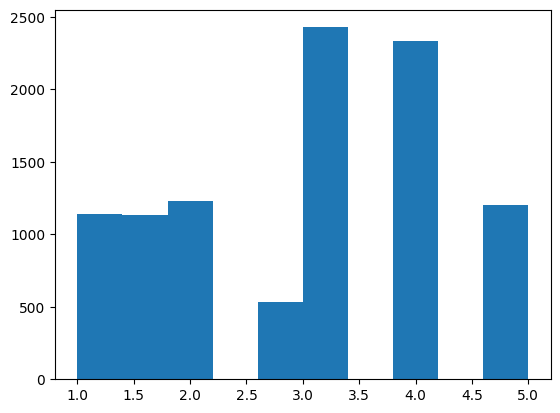

In [12]:

plt.hist(df['Price Per Unit'])
plt.show()

In [13]:
df['Price Per Unit'].skew()

np.float64(0.00471795791909869)

# Dealing with Total Spent

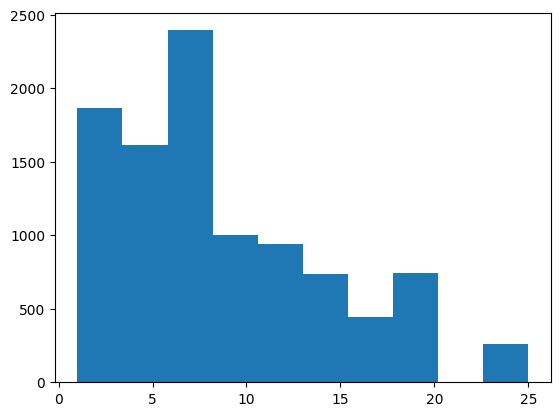

In [14]:
plt.hist(df['Total Spent'])
plt.show()

In [15]:
df['Total Spent'].skew()

np.float64(0.8673672556795592)

# Finding outliers

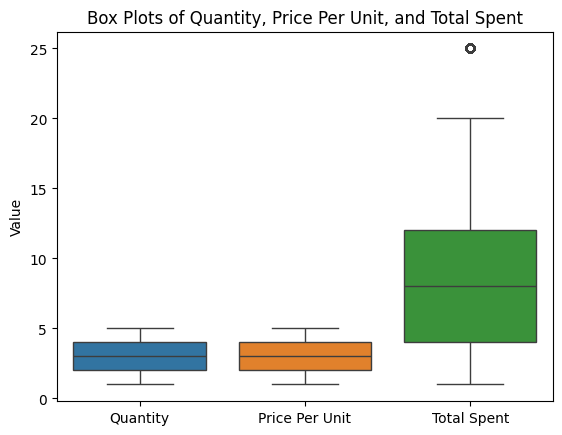

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of numeric columns to plot
cols = ['Quantity', 'Price Per Unit', 'Total Spent']

# Create box plots for each column
sns.boxplot(data=df[cols])
plt.title("Box Plots of Quantity, Price Per Unit, and Total Spent")
plt.ylabel("Value")
plt.show()

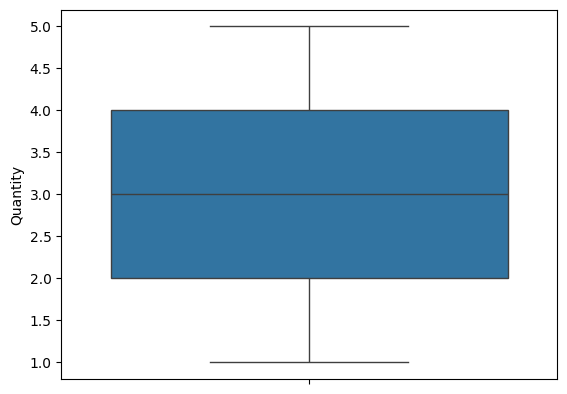

In [17]:
sns.boxplot(y=df['Quantity'])
plt.show()

#no outlier

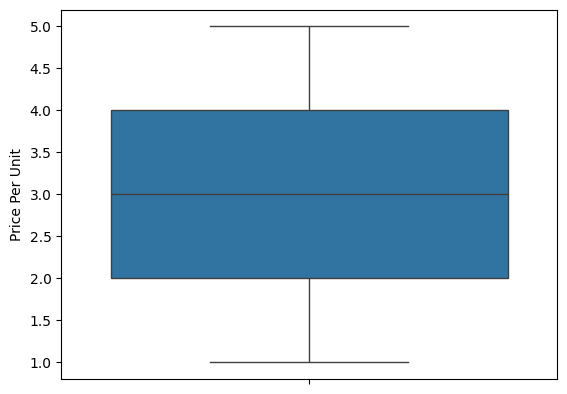

In [18]:
sns.boxplot(y=df['Price Per Unit'])
plt.show()

#no outlier

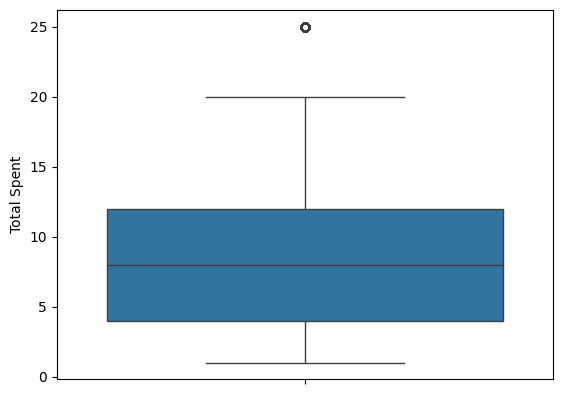

In [19]:
sns.boxplot(y=df['Total Spent'])
plt.show()

#one outlier

In [20]:
def detect_outliers(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data < lower_bound) | (data > upper_bound)]
  return outliers

Total_spent_outliers=detect_outliers(df['Total Spent'])
print(Total_spent_outliers)


# will keep them to understand customer behvaiour- but after forming the graph it seems as this outlier is dominating hence
#will remove.

Q1 = df['Total Spent'].quantile(0.25)
Q3 = df['Total Spent'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Total Spent'] >= lower) & (df['Total Spent'] <= upper)]

print(df_no_outliers)




10      25.0
51      25.0
52      25.0
96      25.0
100     25.0
        ... 
9791    25.0
9805    25.0
9879    25.0
9908    25.0
9971    25.0
Name: Total Spent, Length: 259, dtype: float64
     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0       TXN_1961373    Coffee       2.0        2.000000          4.0   
1       TXN_4977031      Cake       4.0        3.000000         12.0   
2       TXN_4271903    Cookie       4.0        1.000000          8.0   
3       TXN_7034554     Salad       2.0        5.000000         10.0   
4       TXN_3160411    Coffee       2.0        2.000000          4.0   
...             ...       ...       ...             ...          ...   
9995    TXN_7672686    Coffee       2.0        2.000000          4.0   
9996    TXN_9659401     Juice       3.0        2.949984          3.0   
9997    TXN_5255387    Coffee       4.0        2.000000          8.0   
9998    TXN_7695629    Cookie       3.0        2.949984          3.0   
9999    TXN_617072

# Sales Over Time

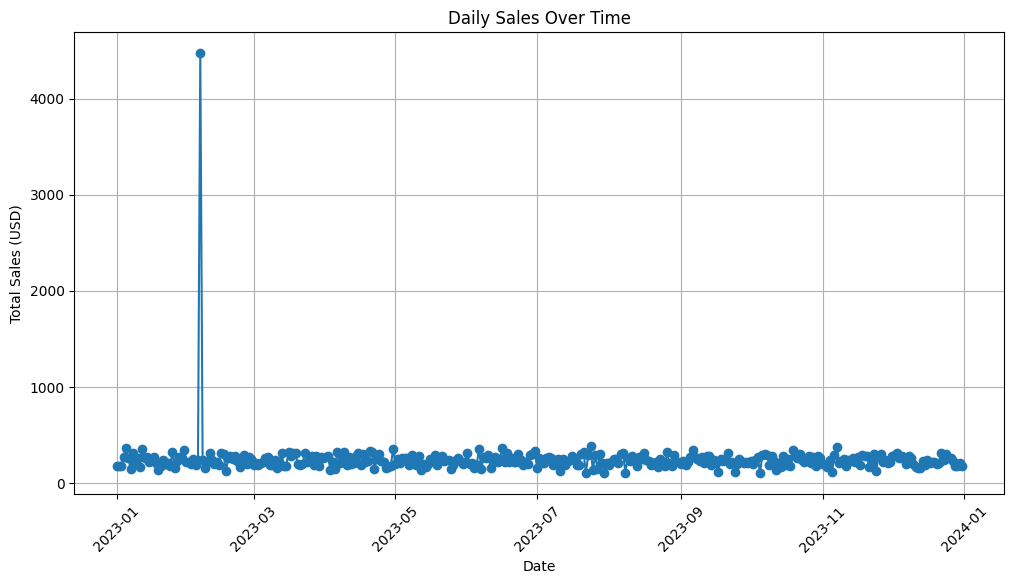

In [31]:

daily_sales = df.groupby('Transaction Date')['Total Spent'].sum().reset_index()


plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Transaction Date'], daily_sales['Total Spent'], marker='o')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Sales by product category


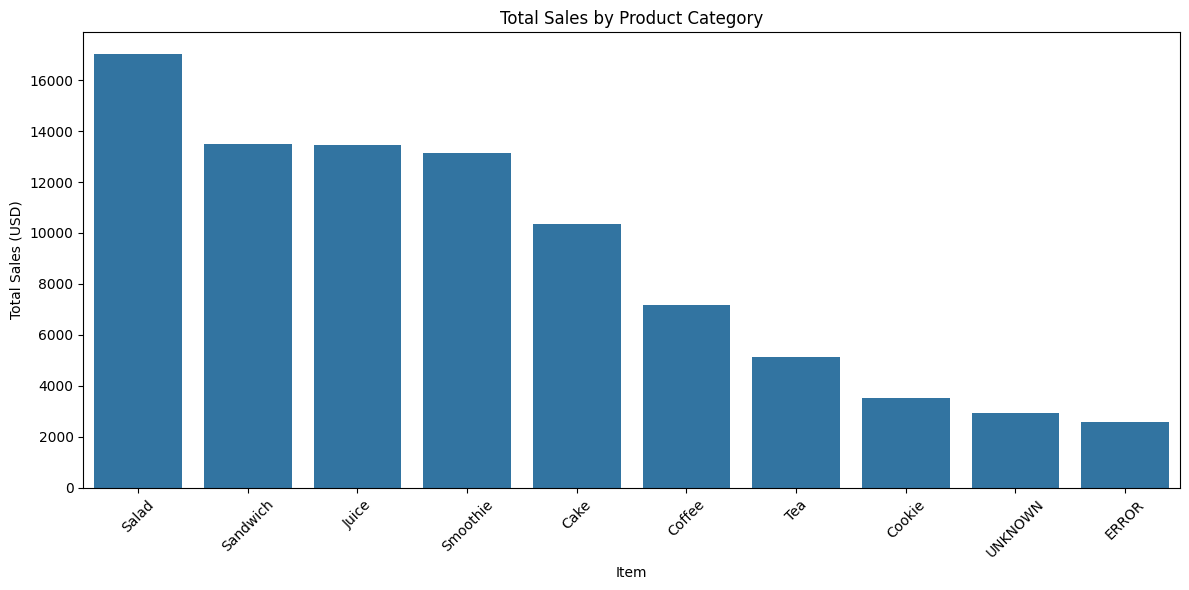

In [21]:
sales_by_item = df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_item.index, y=sales_by_item.values)
plt.title('Total Sales by Product Category')
plt.xlabel('Item')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Purchase distribution among Customer segments.


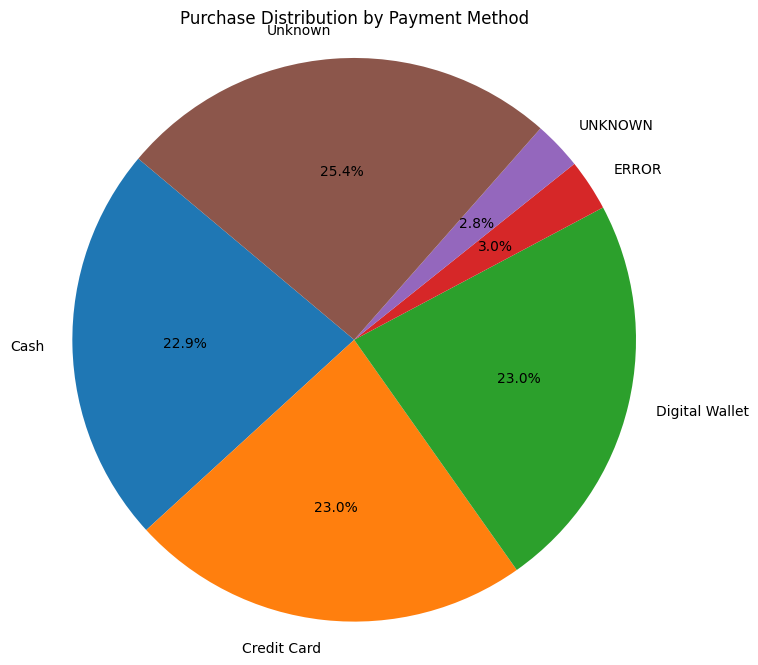

In [22]:
segment_sales = df.groupby('Payment Method')['Total Spent'].sum()


plt.figure(figsize=(8, 8))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Purchase Distribution by Payment Method')
plt.axis('equal')  # Equal aspect ratio for a circle
plt.show()

In [23]:
df['Payment Method'] = df['Payment Method'].replace(['UNKNOWN', 'ERROR','Unknown'], 'Other')

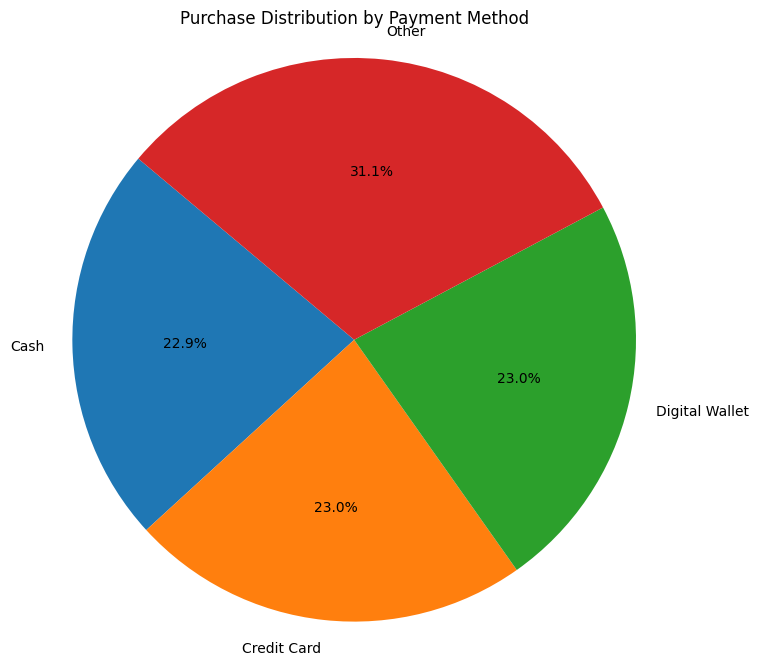

In [24]:
segment_sales = df.groupby('Payment Method')['Total Spent'].sum()


plt.figure(figsize=(8, 8))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Purchase Distribution by Payment Method')
plt.axis('equal')  # Equal aspect ratio for a circle
plt.show()

# Feature Engineering

In [25]:
df['Total Sale'] = df['Quantity'] * df['Price Per Unit']

In [30]:
df['Day of Week'] = df['Transaction Date'].dt.day_name()

df['Hour'] = df['Transaction Date'].dt.hour



print(df['Hour'])

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Hour, Length: 10000, dtype: int32


# Encoding

In [33]:
categorical_columns = ['Item']

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

print(df_encoded)

     Transaction ID  Quantity  Price Per Unit  Total Spent  Payment Method  \
0       TXN_1961373       2.0        2.000000          4.0     Credit Card   
1       TXN_4977031       4.0        3.000000         12.0            Cash   
2       TXN_4271903       4.0        1.000000          8.0     Credit Card   
3       TXN_7034554       2.0        5.000000         10.0           Other   
4       TXN_3160411       2.0        2.000000          4.0  Digital Wallet   
...             ...       ...             ...          ...             ...   
9995    TXN_7672686       2.0        2.000000          4.0           Other   
9996    TXN_9659401       3.0        2.949984          3.0  Digital Wallet   
9997    TXN_5255387       4.0        2.000000          8.0  Digital Wallet   
9998    TXN_7695629       3.0        2.949984          3.0  Digital Wallet   
9999    TXN_6170729       3.0        4.000000         12.0            Cash   

      Location Transaction Date  Total Sale Day of Week  Hour  